#Modelos de Classificação

## 1 - MNIST

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
x, y = mnist['data'].values,mnist['target'].values

In [ ]:
x.shape

(70000, 784)

In [5]:
y = y.astype(np.float)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
y

array([5., 0., 4., ..., 4., 5., 6.])

In [ ]:
n=3

plt.imshow(x[n].reshape(28,28), cmap='binary')
print(y[n])
plt.show()

## Classificador binario 

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
y_train_5 = (y_train == 5)

In [9]:
pd.Series(y_train_5).value_counts()

False    44555
True      4445
dtype: int64

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)

SGDClassifier()

False
Predição [False]


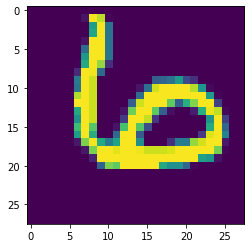

In [ ]:
n=17

plt.imshow(x_train[n].reshape(28,28))

print(y_train_5[n])
print('Predição', sgd_clf.predict([x_train[n]]))

##Metricas

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
cross_val_score(sgd_clf,x_train,y_train_5,cv=5, scoring='accuracy')

array([0.9694898 , 0.95306122, 0.96663265, 0.9522449 , 0.96081633])

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[44116,   439],
       [  897,  3548]])

##Modelos Multiclasses

In [15]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y_train

array([4., 9., 7., ..., 4., 4., 9.])

In [19]:
sgd_clf.fit(x_train,y_train)

SGDClassifier()

In [22]:

y_train_pred = cross_val_predict(sgd_clf,x_train,y_train, cv=3)

In [25]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4592    0   12   13    7   30   24   10   50   21]
 [   0 5141   32   38    6   21    6   11  212   14]
 [  51   47 4186  112   37   11   41   89  276   39]
 [  65   13  165 4222    7  151   14   48  165  102]
 [  17   14   71   34 4040   16   42   87  117  399]
 [  85   18   38  233   49 3419   70   28  357  148]
 [  74   17  128   15   20   77 4399   20   90    8]
 [  30   16   83   43   38   30    4 4532   34  340]
 [  57   66  108  186   17  244   30   32 3770  232]
 [  34   11   23  189   83   70    0  283  142 4062]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      4759
         1.0       0.96      0.94      0.95      5481
         2.0       0.86      0.86      0.86      4889
         3.0       0.83      0.85      0.84      4952
         4.0       0.94      0.84      0.88      4837
         5.0       0.84      0.77      0.80      4445
         6.0       0.95      0.91      0.93      4848
         7.0       0.88      0.88   

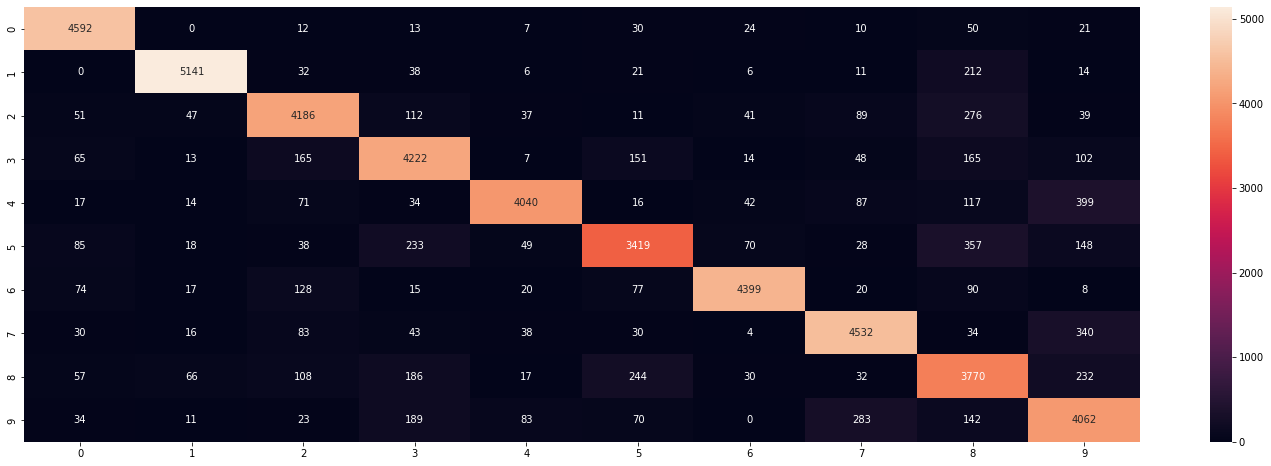

In [26]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(conf_mx, annot=True, fmt='.0f')